# QMCPy basic example

In [13]:
import qmcpy as qp
import numpy as np
from matplotlib import pyplot as plt

## Sobol samples from QMC Software Tutorial notebook

Plot a normalised ($\mathcal{U}[0,1]^d$) Sobol distribution in 2D.

Text(0.5, 1.0, 'Sobol samples')

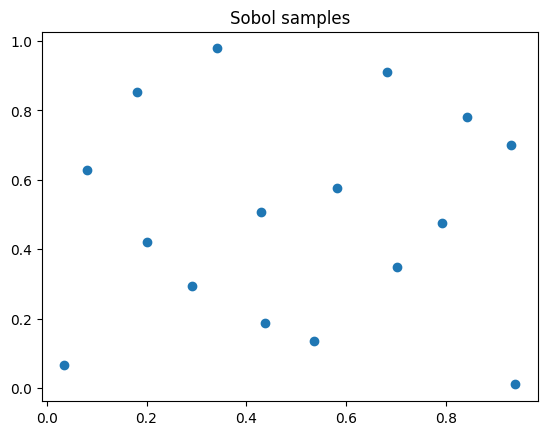

In [14]:
sobol = qp.Sobol(2)
points = sobol.gen_samples(16)
fig, ax = plt.subplots()
ax.scatter(x=points[:, 0], y=points[:, 1])
ax.set_title("Sobol samples")

Use a `TrueMeasure` object to transform to non-normalised values, or other distribution types. Using a uniform true measure, transform to actual values of $x$ in the desired ranges.

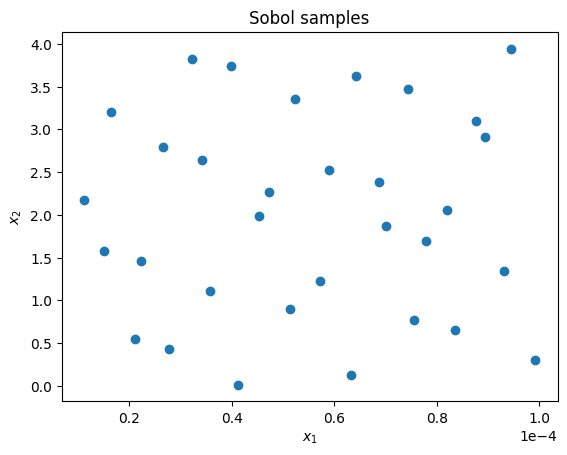

In [27]:
discrete_distribution = qp.Sobol(2)
true_measure = qp.Uniform(
    sampler=discrete_distribution, lower_bound=[1.0e-5, 0], upper_bound=[1.0e-4, 4]
)
x = true_measure.gen_samples(2**5)
fig, ax = plt.subplots()
ax.scatter(x=x[:, 0], y=x[:, 1])
ax.set_title("Sobol samples")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))

Now evaluate at those sample points using an `Integrand`.

/tmp/ipykernel_726866/1061473872.py:11


Text(0.5, 1.0, 'Sobol samples')

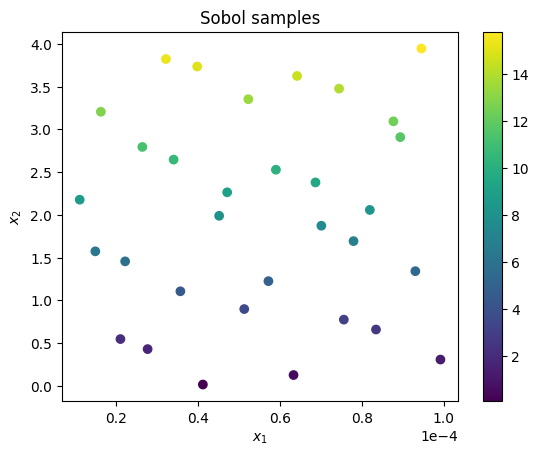

In [40]:
def example_func(x):
    return x[:, 0] ** 2 + x[:, 1]


integrand = qp.integrand.CustomFun(
    true_measure=true_measure, g=example_func, dimension_indv=(1,)
)
y = integrand.f(x)

fig, ax = plt.subplots()
cm = plt.cm.get_cmap("viridis")
pc = ax.scatter(x=x[:, 0], y=x[:, 1], c=y, cmap=cm)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
fig.colorbar(pc, ax=ax)
ax.set_title("Sobol samples")

Function has been evaluated at Sobol samples in 2D.

## QMCPy Quickstart

In [5]:
d = 2
dnb2 = qp.DigitalNetB2(d)
gauss_sobol = qp.Gaussian(dnb2, mean=0, covariance=1 / 2)
k = qp.CustomFun(
    true_measure=gauss_sobol,
    g=lambda x: np.pi ** (d / 2) * np.cos(np.linalg.norm(x, axis=1)),
)
qmc_sobol_algo = qp.CubQMCSobolG(k, abs_tol=1e-1)
sol, data = qmc_sobol_algo.integrate()
print(data)

LDTransformData (AccumulateData Object)
    solution        1.807
    comb_bound_low  1.802
    comb_bound_high 1.812
    comb_flags      1
    n_total         2^(10)
    n               2^(10)
    time_integrate  0.002
CubQMCSobolG (StoppingCriterion Object)
    abs_tol         0.100
    rel_tol         0
    n_init          2^(10)
    n_max           2^(35)
CustomFun (Integrand Object)
Gaussian (TrueMeasure Object)
    mean            0
    covariance      2^(-1)
    decomp_type     PCA
DigitalNetB2 (DiscreteDistribution Object)
    d               2^(1)
    dvec            [0 1]
    randomize       LMS_DS
    graycode        0
    entropy         85551102236614741415911824012389874498
    spawn_key       ()
